In [282]:
# https://pypi.org/project/googlefinance/
# from googlefinance import getQuotes

# https://aroussi.com/post/python-yahoo-finance
import yfinance as yf

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)



In [283]:
# On charge le dataset
stock_list = pd.read_csv('data_finance/stocks.csv')['symbol_yf'].tolist()
index_list = pd.read_csv('data_finance/index.csv')['symbol_yf'].tolist()

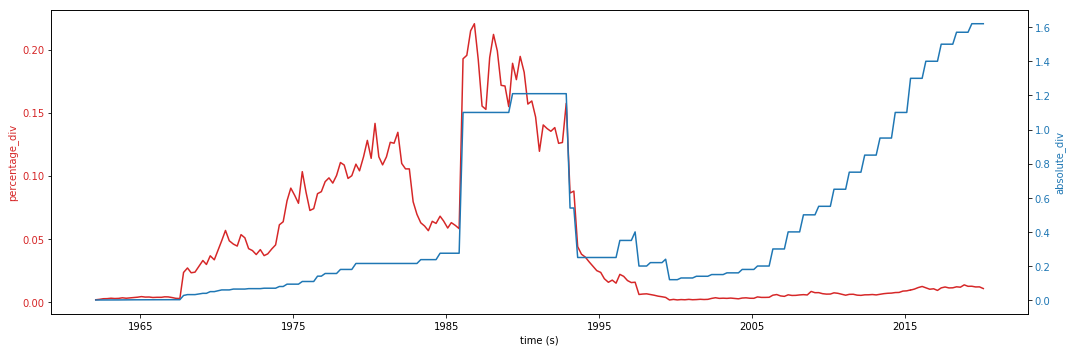

In [284]:
msft = yf.Ticker("IBM")
# get stock info
msft.info
percentage_div = msft.dividends / msft.history(period="max")['Close'].loc[msft.dividends.index]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('percentage_div', color=color)
ax1.plot(percentage_div, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('absolute_div', color=color)  # we already handled the x-label with ax1
ax2.plot(msft.dividends, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

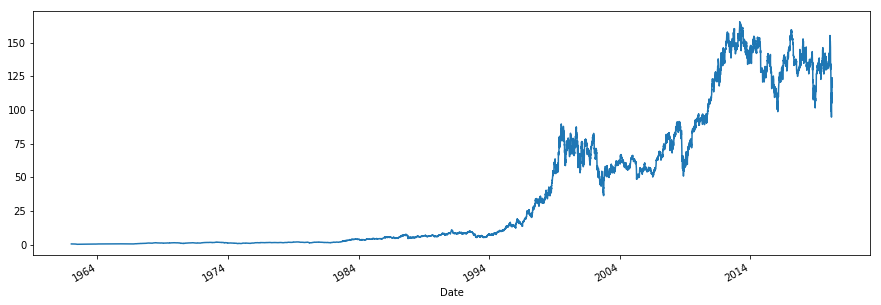

In [285]:
msft.history(period='max')['Close'].plot()


[*********************100%***********************]  15 of 15 completed


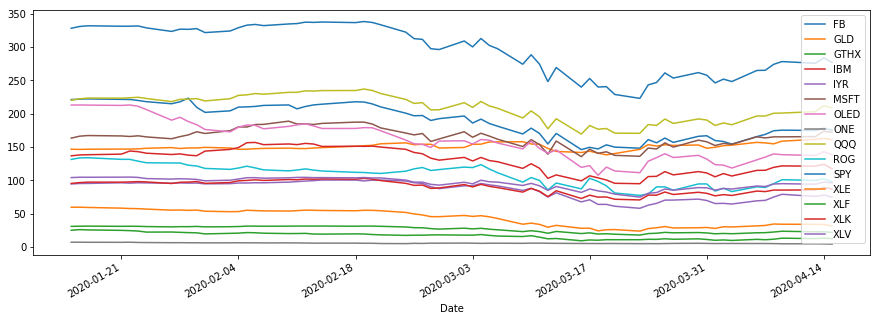

In [286]:
data = yf.download(stock_list, period="3mo", thread = 10)['Close']
data.plot()
plt.show()


[*********************100%***********************]  36 of 36 completed

1 Failed download:
- ^SPY: No data found for this date range, symbol may be delisted


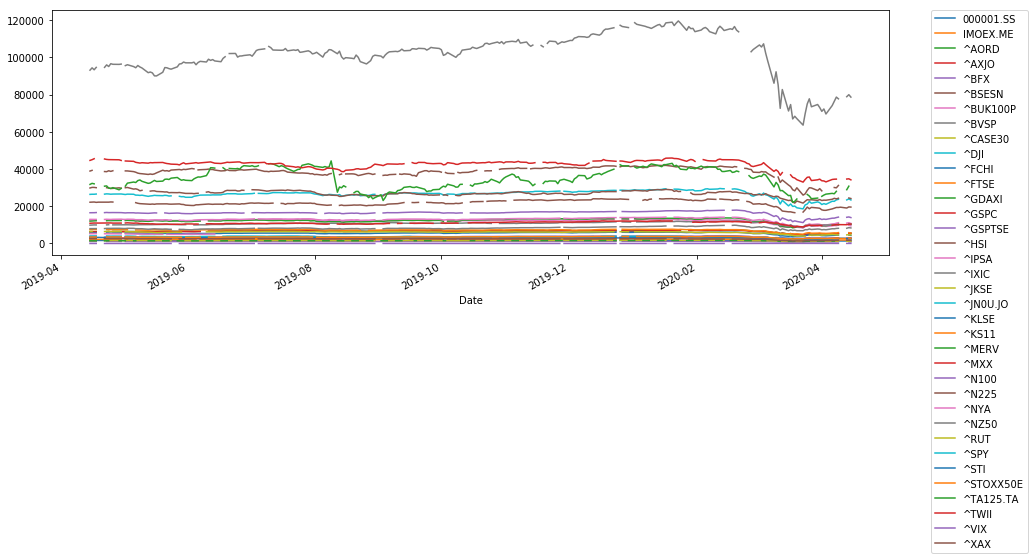

In [287]:
data = yf.download(index_list, period="1Y", thread = 10)['Close']
data.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


/Users/nielsou/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


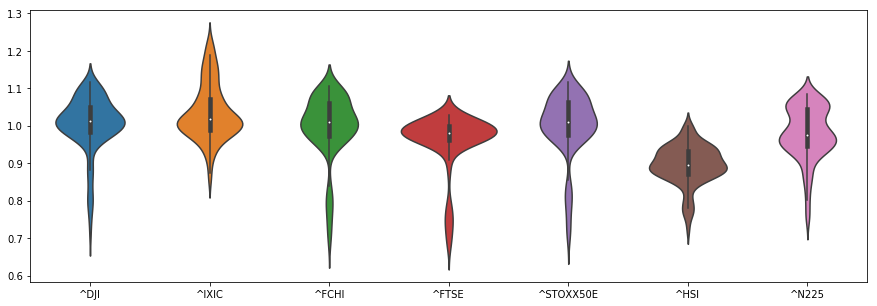

In [295]:
# running various draws of most common index 
favourite_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
scaled_index = data[favourite_index]/data[favourite_index].iloc[1]
scaled_index.to_csv('logs/prefered_scaled_index.csv')
ax = sns.violinplot(data=scaled_index)

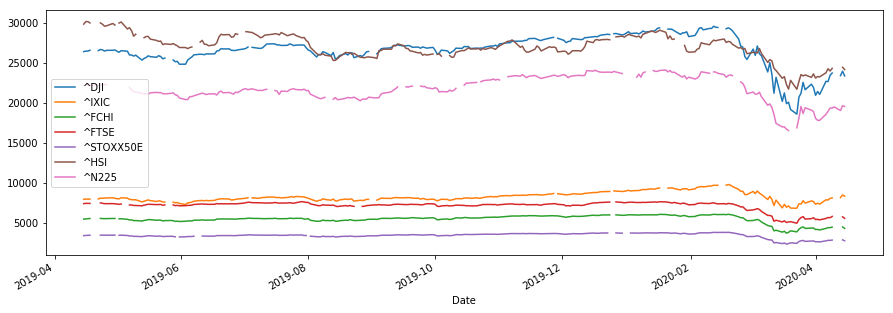

In [289]:
data[favourite_index].plot()


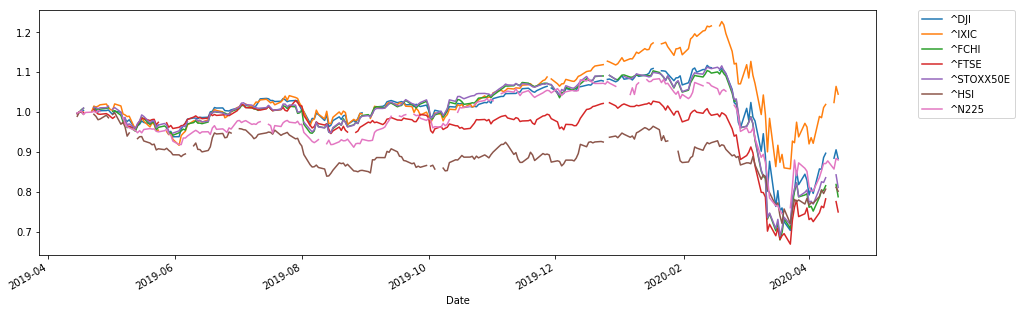

In [290]:
scaled_index.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [294]:
import datetime 
scaled_index.index.dayofyear

Int64Index([105, 106, 107, 108, 109, 112, 113, 114, 115, 116,
            ...
             93,  94,  97,  98,  99, 100, 101, 104, 105, 106],
           dtype='int64', name='Date', length=262)